# Control analyses for CPM paper
This notebook reproduces control analyses for the CPM project.  
- **BANDA dataset**: all other self-reported measures acquired at T3 + some demographic info (acquired at T1)  
- **ABCD dataset**: replication of main models which shows comparison with all other CBCL subscales

Outputs: barplots of Spearman correlations for different predictors, one for ABCD and one for BANDA.

In [21]:
# General
import pandas as pd
import numpy as np
from glob import glob

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def mysavefig(figure, out_d, outname):
    figure.savefig(f"{out_d}/{outname}.png", format="png", transparent=True, dpi=300)

# BANDA

In [5]:
# Paths
main_proj = '/projects/swglab/data/BANDA_U01'
in_d=f'{main_proj}/analysis/proj_franci_anxiety/cpm/cross_datasets_external_validation'
out_d=f'{main_proj}/scripts/proj_franci_anxiety/outputs'

In [6]:
# Load all results
dfs = []
for grab in glob(f'{in_d}/*csv'):
    df = pd.read_csv(grab)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

In [18]:
# Add metadata
df['predictor'] = df['outcome'] + df['timepoint'] 
df['questionnaire'] = df['predictor'].str.split('_', n=1, expand=True)[0] # creating a 'class' column for plotting by color

# Remove numbers from the 'questionnaire' column for legibility
df['questionnaire'] = df['questionnaire'].str.replace(r'\d+', '', regex=True)
df.head(3)['r_spearman']

0    0.198556
1    0.068958
2    0.027934
Name: r_spearman, dtype: float64

# BANDA
(all measures from T3 and demographics/general from T1)

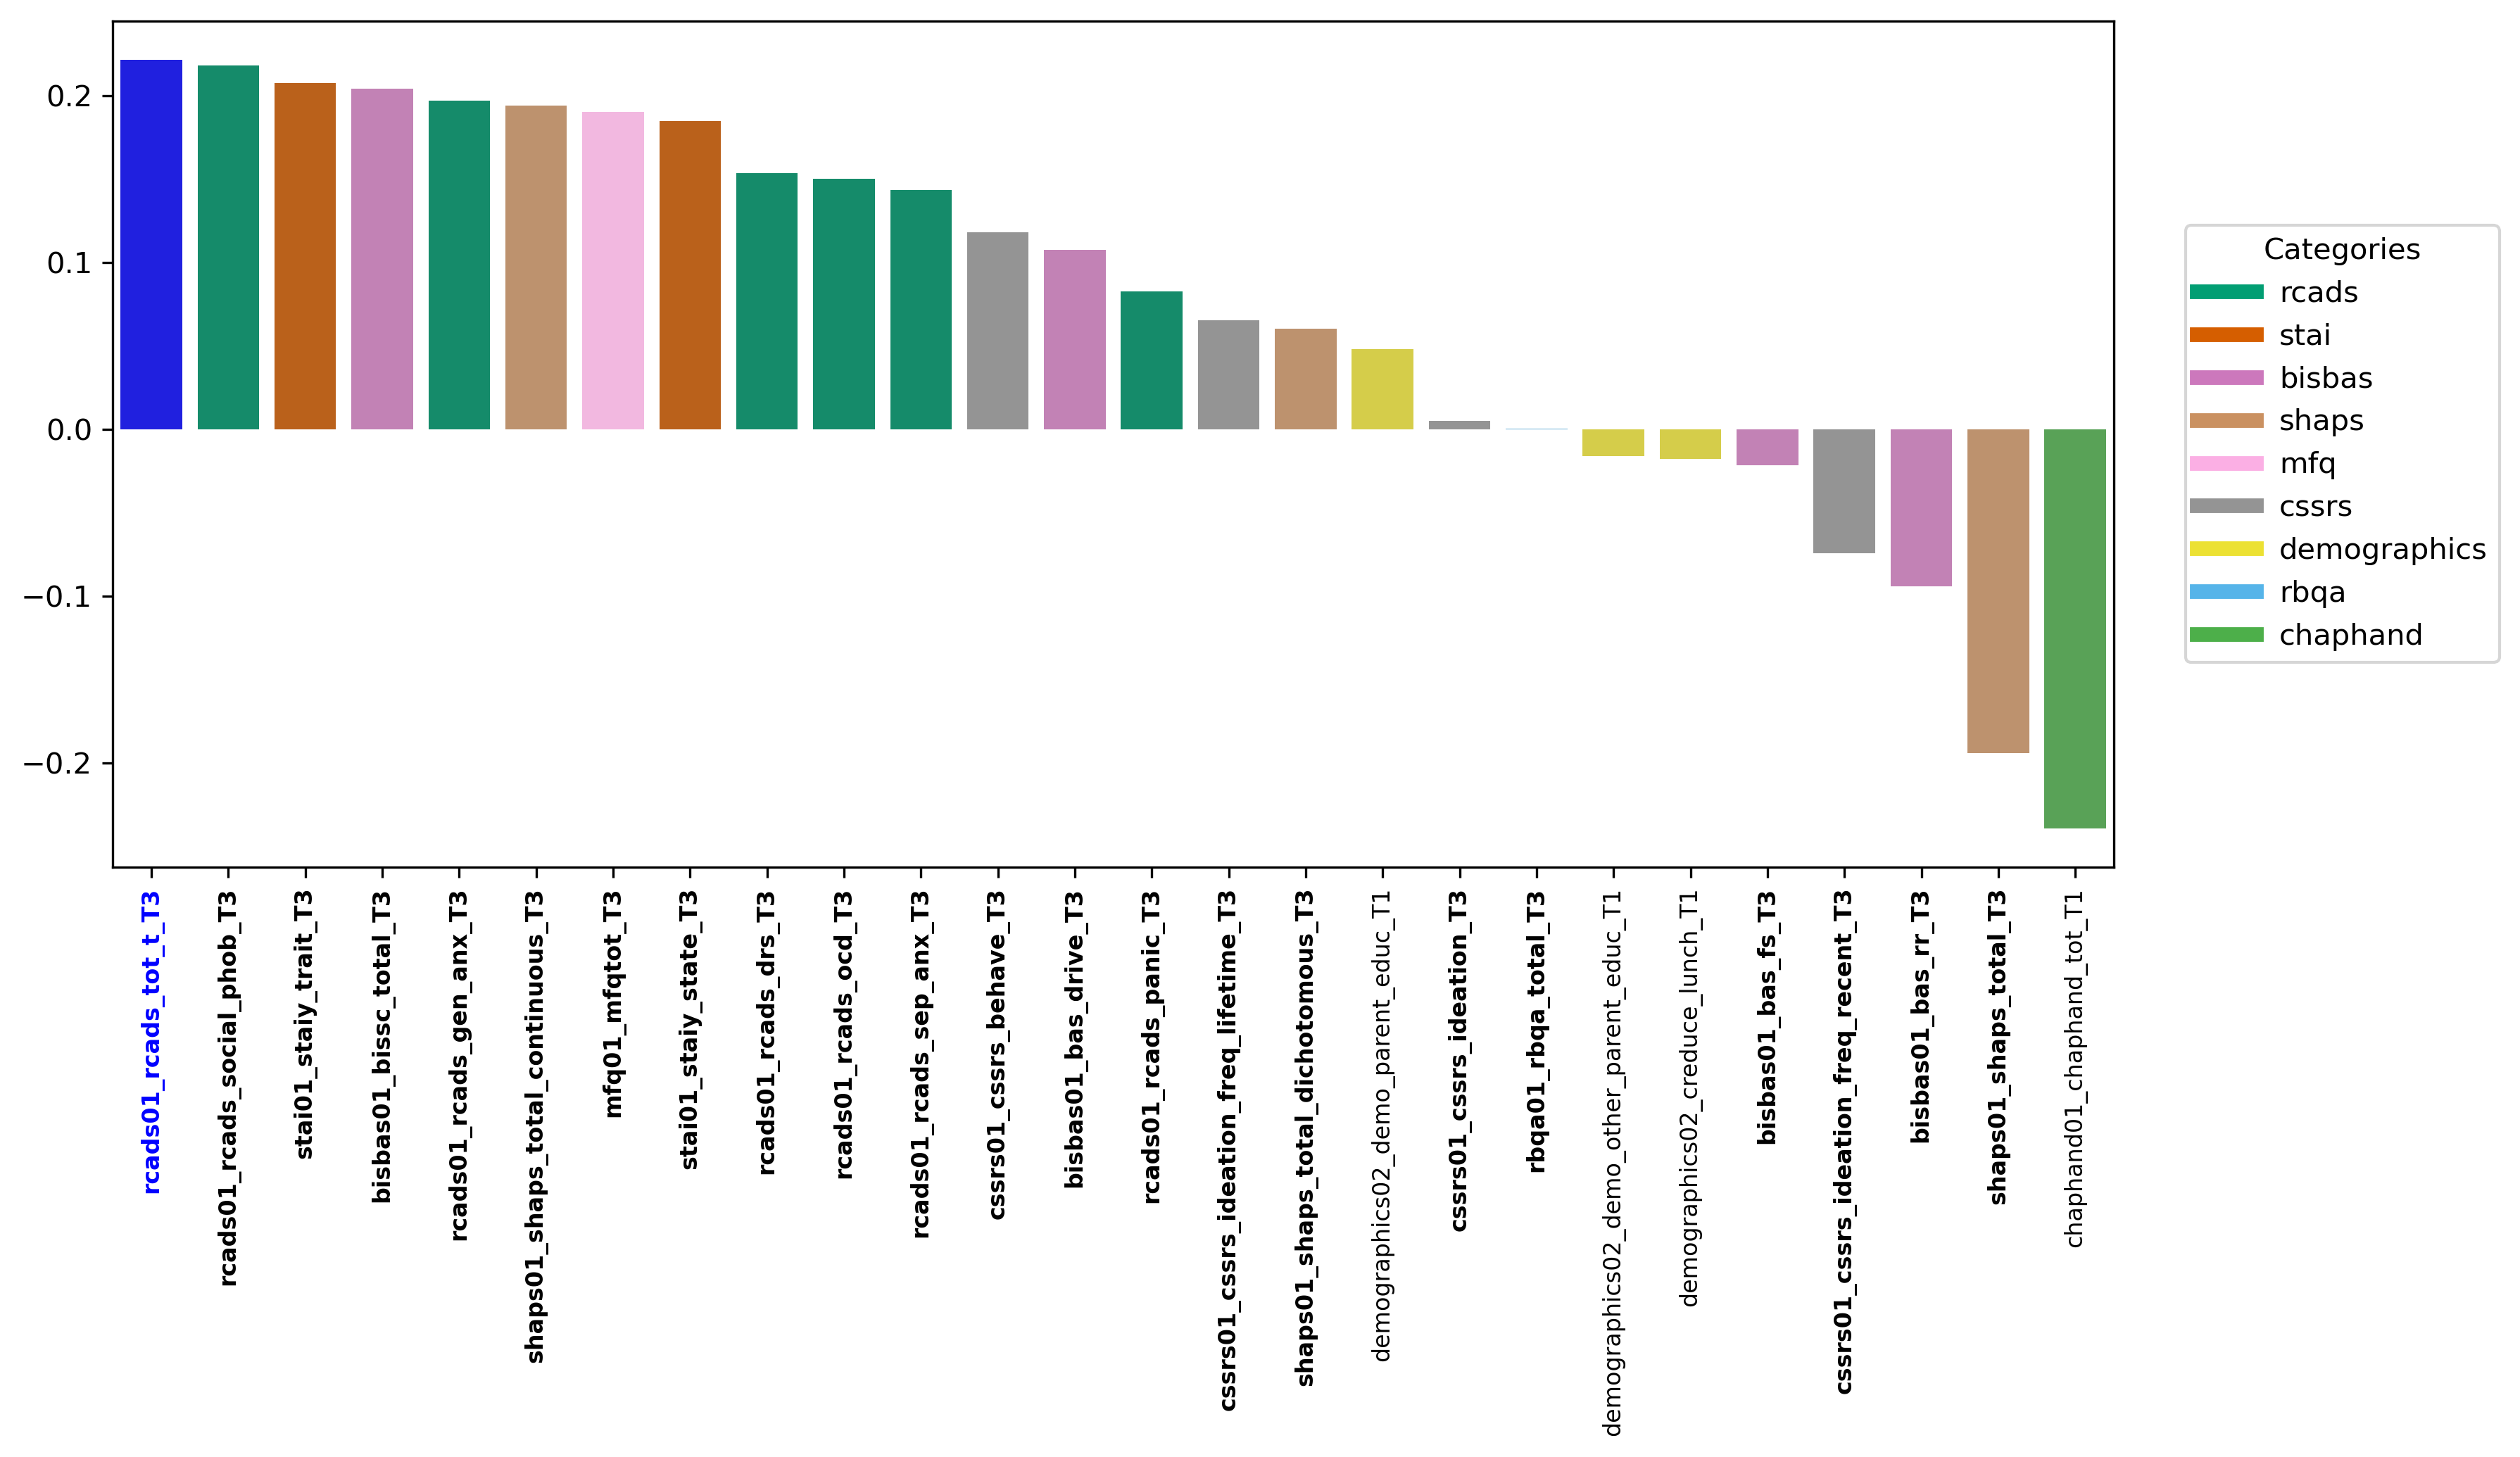

In [25]:
tmp = df.copy()
tmp = tmp.sort_values(by="r_spearman", ascending=False)
tmp = tmp[(tmp['predictor'].str.contains('T3')) | (tmp['predictor'].str.contains('demo')) | (tmp['predictor'].str.contains('chap'))] 

######
# include any outcome that contains these substrings
grab = ['demo', 'T3', 'wasi','chaphand'] 
pattern = '|'.join(grab)
tmp['keep'] = tmp['predictor'].apply(lambda x: 'include' if pd.Series(x).str.contains(pattern, case=False).any() else 'exclude')
tmp = tmp[tmp['keep'] == 'include']

######
# Define color palettes
palette_1 = sns.color_palette("colorblind", 10)[2:]  # Palette with 8 colors
palette_2 = sns.color_palette("Set1", 8)[2:]  # Palette with 8 colors
palette_3 = sns.color_palette("husl", 8)  # Palette with 6 colors
full_palette = palette_1 + palette_2 + palette_3  # Combine all palettes
assert len(full_palette) >= len(tmp['questionnaire'].unique()), "Not enough colors for categories"
category_to_color = dict(zip(tmp['questionnaire'].unique(), full_palette))

# Create a color column based on questionnaire type
tmp['color'] = tmp['questionnaire'].map(category_to_color)

# Hardcode color for the specific predictor
tmp.loc[tmp['predictor'] == 'rcads01_rcads_tot_t_T3', 'color'] = 'blue'

# Plot
plt.figure(figsize=(12, 7), dpi=300)
ax = sns.barplot(x="predictor", y="r_spearman", data=tmp, palette=tmp['color'].values)

# Manually create the legend
handles = [plt.Line2D([0], [0], color=color, lw=5) for color in category_to_color.values()]
labels = category_to_color.keys()
plt.legend(handles, labels, title="Categories", bbox_to_anchor=(1.2, 0.5), loc='right')

# Customize the x-axis labels
# First, get the current x-tick labels
xticks = ax.get_xticklabels()

# Loop through the x-tick labels and change their color based on the 'timepoint' or 'predictor'
for label in xticks:
    if 'T3' in label.get_text():
        label.set_color('black') 
        label.set_fontweight('bold')
        
    elif 'T1' in label.get_text():
        label.set_color('black') 
        
    if 'rcads01_rcads_tot_t_T3' in label.get_text():
        label.set_color('blue')  # Special predictor in red
        label.set_fontweight('bold')  # Set the text to bold

# Update the x-tick labels with the new colors
ax.set_xticklabels(xticks)
ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=90, fontsize=8)

# Get y-axis limits
y_min, y_max = ax.get_ylim()
dynamic_offset = (y_max - y_min) * 0.005  # Adjust offset dynamically based on y-axis range

plt.tight_layout()
plt.show()

g = ax.get_figure()
mysavefig(g,out_d,'banda_control_analysis') 

# ABCD

In [20]:
grab_f='/projects/swglab/data/BANDA_U01/analysis/proj_franci_anxiety/cpm/cross_datasets_external_validation/abcd_control_analysis_cbcl_scr_syn_anxdep_t_y1_gordon352_2fold_spearman_partialcovar_cbcl_scr_syn_anxdep_t_blmeanFDjsex_xinterview_age_bl_p0.001_FD0.25_allsubjs.csv'

abcd = pd.read_csv(grab_f)
abcd.head(3)

,discovery_dataset,discovery_preproc,discovery_model,direction,edge_retention,outcome,timepoint,covariates,mae,mape,mse,rmse,r_spearman,p_spearman
0,abcd,10min,cbcl_scr_syn_anxdep_t_y1_gordon352_2fold_spear...,posneg,0,cbcl_scr_syn_anxdep_t_y1,T3,allcovars,4.1756,7.3063,34.7799,5.8951,0.198556,0.000000
1,abcd,10min,cbcl_scr_syn_anxdep_t_y1_gordon352_2fold_spear...,posneg,0,cbcl_scr_syn_withdep_t_y1,T3,allcovars,4.0577,7.1978,31.1850,5.5821,0.068958,0.000026
2,abcd,10min,cbcl_scr_syn_anxdep_t_y1_gordon352_2fold_spear...,posneg,0,cbcl_scr_syn_somatic_t_y1,T3,allcovars,4.4674,7.7155,36.2707,6.0201,0.027934,0.088730


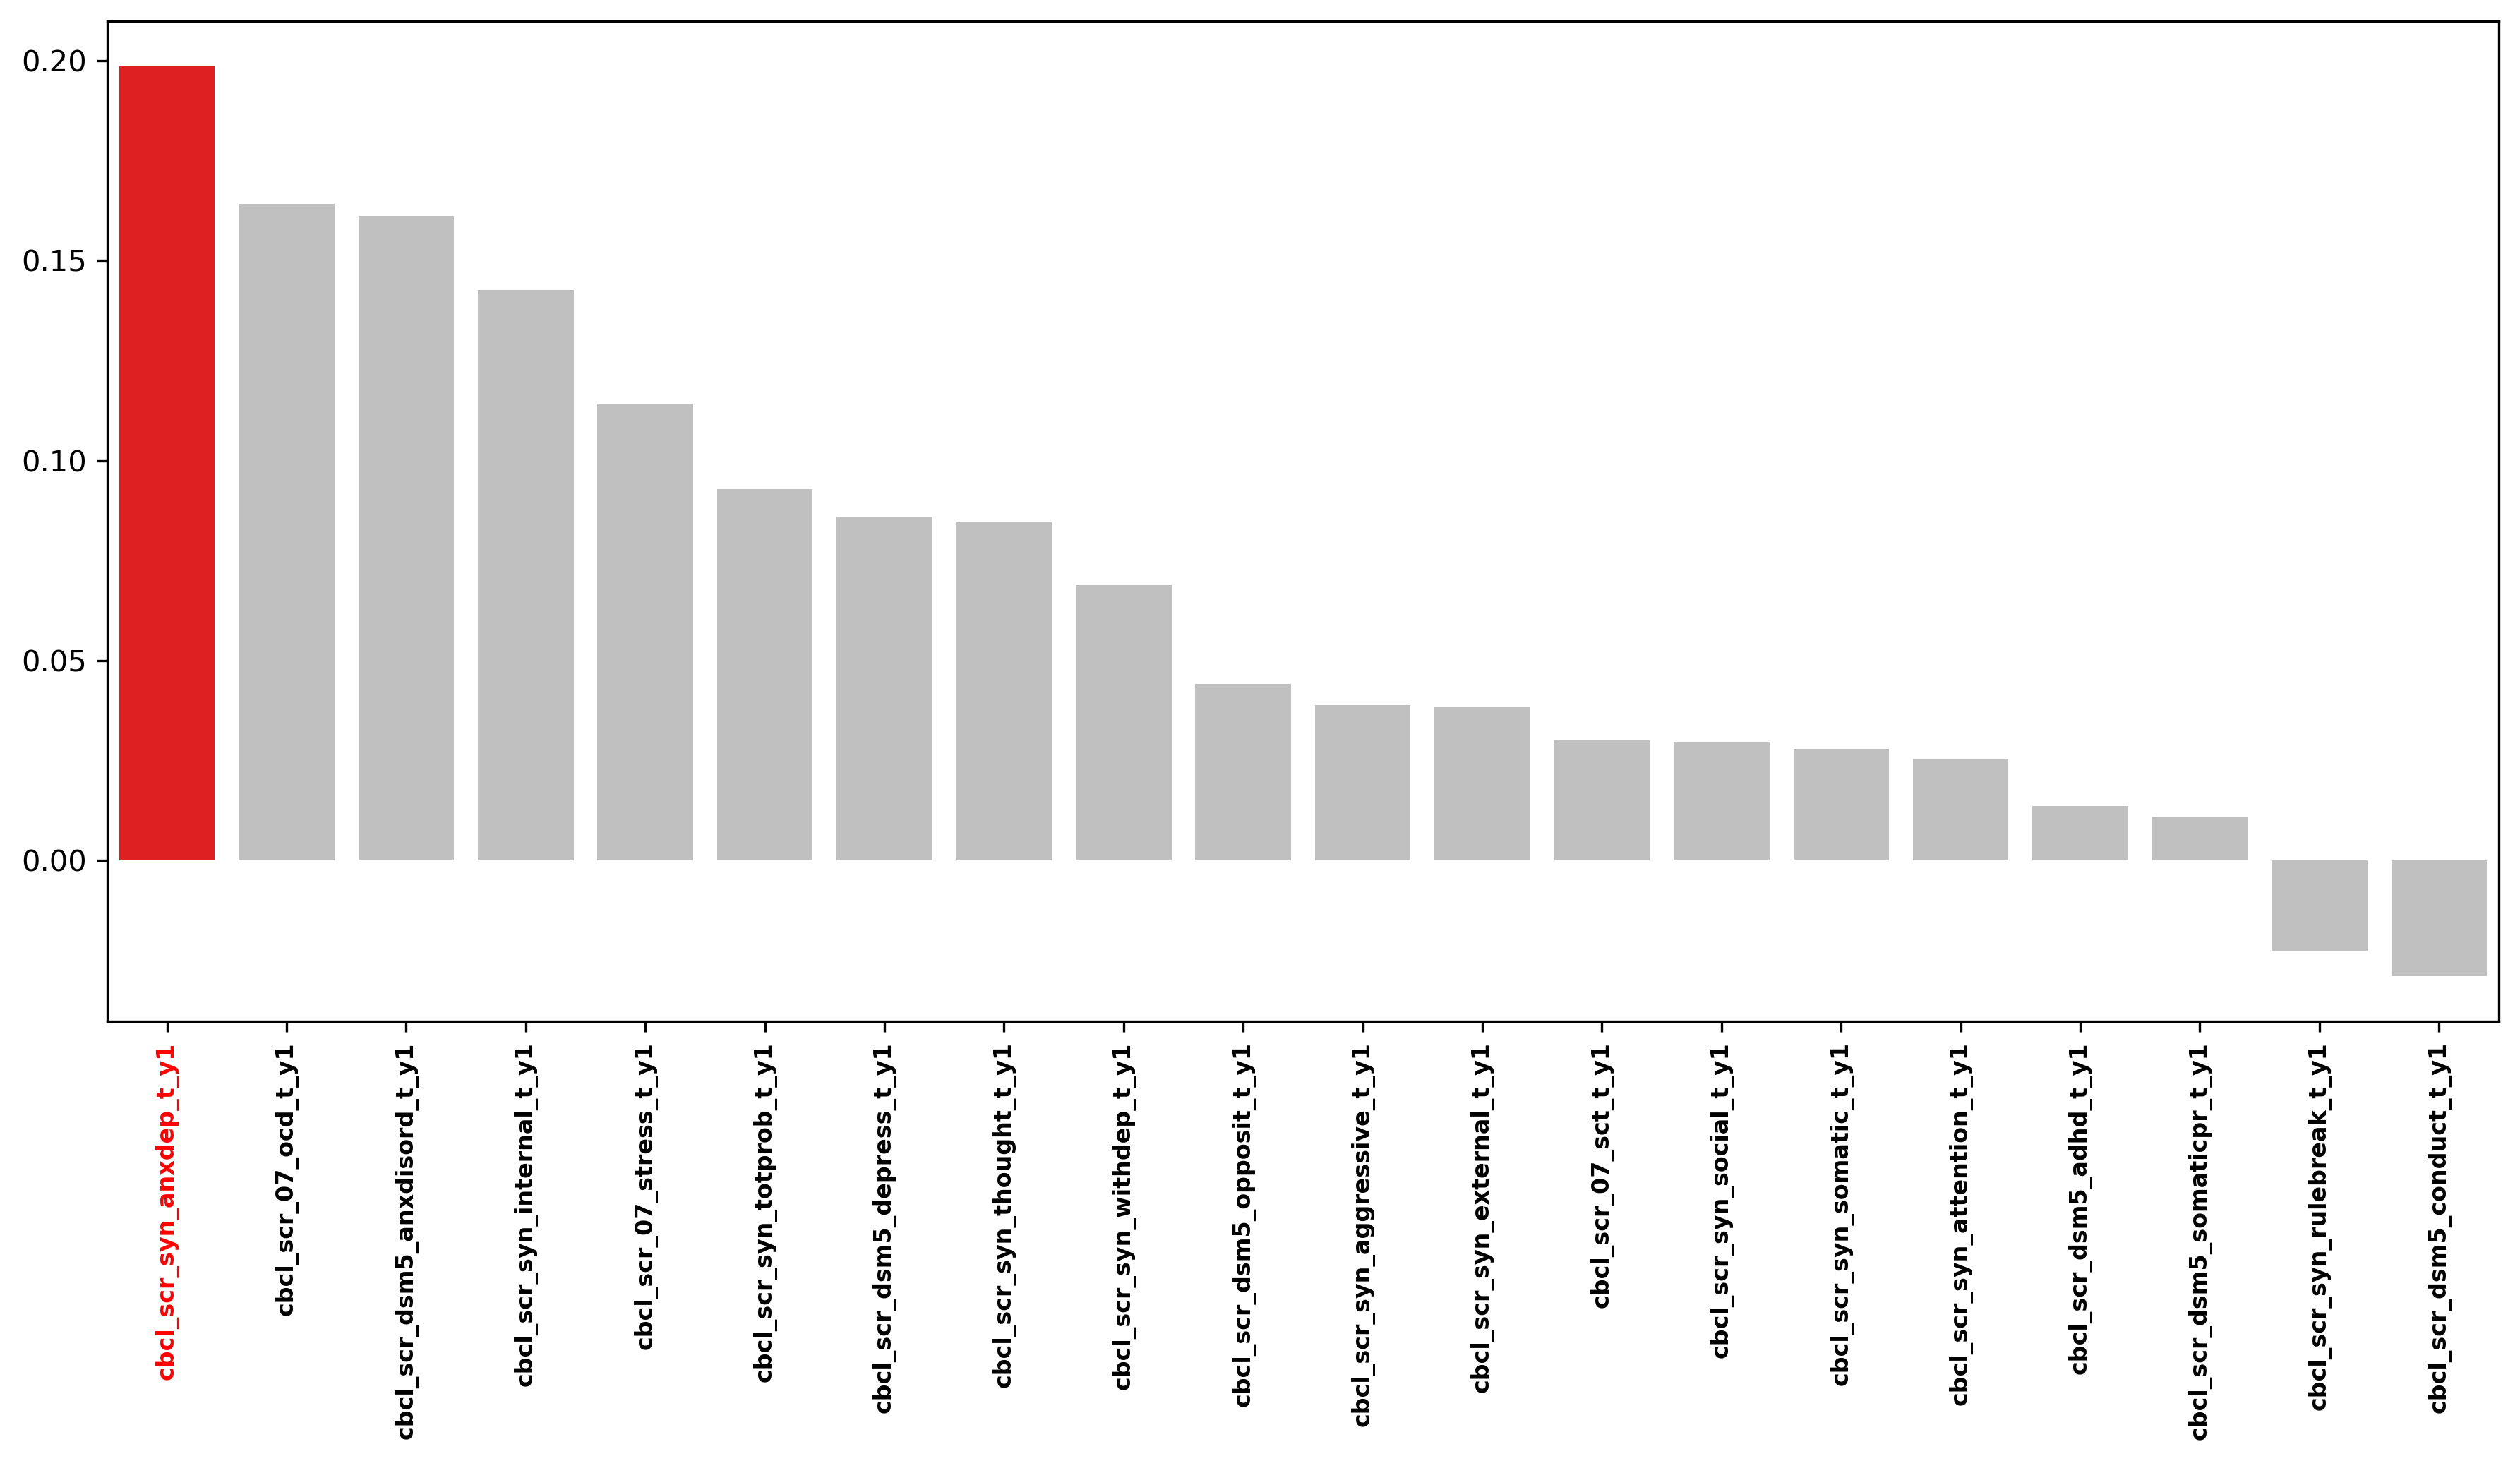

In [31]:
tmp = abcd.copy()
tmp = tmp.sort_values(by="r_spearman", ascending=False)

######
# color
tmp['color'] = 'silver'
tmp.loc[tmp['outcome'] == 'cbcl_scr_syn_anxdep_t_y1', 'color'] = 'red' # Hardcode color for main model

# Plot
plt.figure(figsize=(12, 7), dpi=300)
ax = sns.barplot(x="outcome", y="r_spearman", data=tmp, palette=tmp['color'].values)

xticks = ax.get_xticklabels()

# Loop through the x-tick labels and change their color based on the 'timepoint' or 'predictor'
for label in xticks:
    if 'y1' in label.get_text():
        label.set_color('black') 
        label.set_fontweight('bold')
        
    elif 'y' in label.get_text():
        label.set_color('black') 
        
    if 'cbcl_scr_syn_anxdep_t_y1' in label.get_text():
        label.set_color('red')  # Special predictor in red
        label.set_fontweight('bold')  # Set the text to bold

# Update the x-tick labels with the new colors
ax.set_xticklabels(xticks)
ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=90, fontsize=8)
y_min, y_max = ax.get_ylim()
dynamic_offset = (y_max - y_min) * 0.005

plt.tight_layout()
plt.show()

g = ax.get_figure()
mysavefig(g,out_d,'abcd_control_analysis') 